In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import *
import xgboost as xgb
from sklearn.isotonic import IsotonicRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam


In [6]:
sim_df = pd.read_csv("../data/csv/sim_ref_data_7.csv")

<AxesSubplot:>

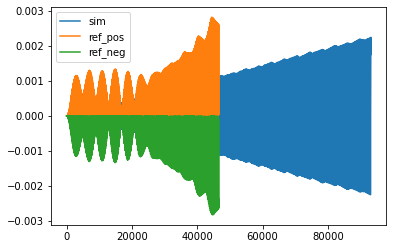

In [7]:
sim_df.plot()

In [8]:
print(sim_df[sim_df.sim >= 0].shape)
print(sim_df[sim_df.sim < 0].shape)

(46474, 3)
(46638, 3)


In [9]:
sim_pos = sim_df[sim_df.sim >= 0].sim.values
ref_pos = sim_df["ref_pos"].dropna().values

In [10]:
print(sim_pos.shape)
print(ref_pos.shape)

(46474,)
(46563,)


In [11]:
ref_pos = ref_pos[:sim_pos.shape[0]]
print(ref_pos.shape)

(46474,)


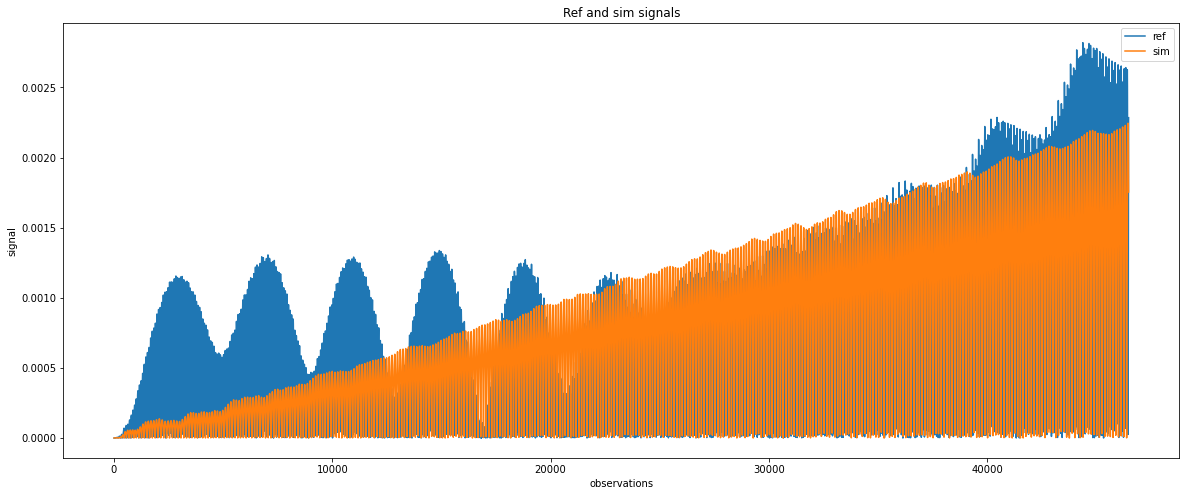

In [12]:
plt.figure(figsize = (20,8))
plt.plot(ref_pos, label = "ref")
plt.plot(sim_pos, label = "sim")
plt.title("Ref and sim signals")
plt.xlabel("observations")
plt.ylabel("signal")
plt.legend()
plt.show()

# Train test split

**80% Train-20% Test**

In [13]:
X_train = sim_pos[:int(len(sim_pos) * 0.8)]
X_test = sim_pos[int(len(sim_pos) * 0.8):]
y_train = ref_pos[:int(len(ref_pos) * 0.8)]
y_test = ref_pos[int(len(ref_pos) * 0.8):]

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37179,)
(9295,)
(37179,)
(9295,)


In [43]:
#XX_Train,yy_train,yy_test,xx_test = train_test_split(sim_pos,ref_pos,test_size = 0.2,random_state = 0, shuffle = False)

In [15]:
def root_mean_squared_error(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

# Entrainement modèle régression linéaire

In [31]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [101]:
reg = LinearRegression().fit(X_train, y_train)

In [102]:
print(reg.score(X_test, y_test))

-0.7037087696006645


In [103]:
y_pred = reg.predict(X_test)

In [104]:
mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.0009532775702276896

In [105]:
mean_absolute_error(y_test,y_pred)

0.0008064738725979503

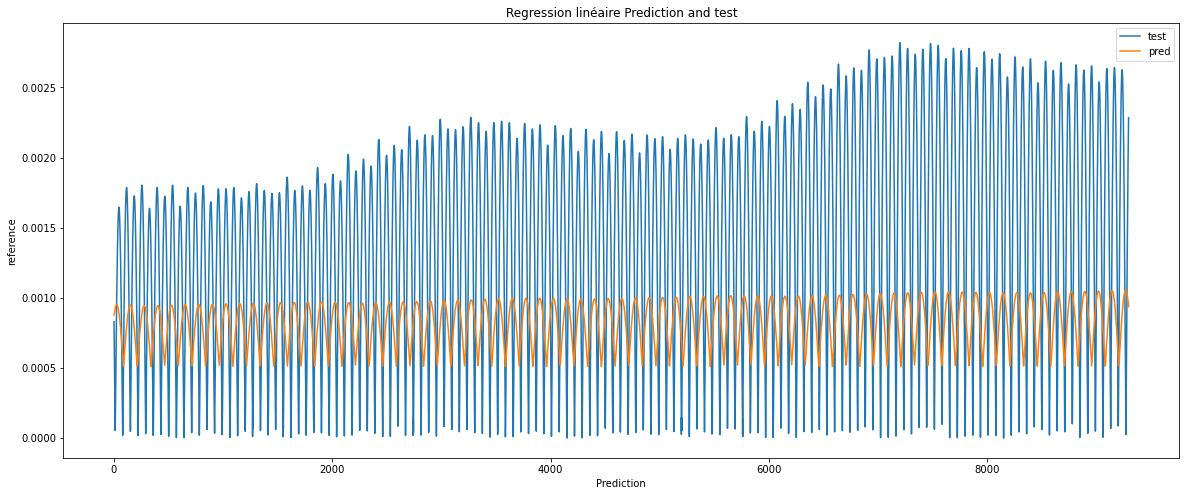

In [106]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "pred")
plt.title("Regression linéaire Prediction and test")
plt.xlabel("Prediction")
plt.ylabel("reference")
plt.legend()
plt.show()

In [107]:
reg = LinearRegression(normalize = True)
reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [108]:
y_pred = reg.predict(X_test)
y_pred

array([0.00087641, 0.0008825 , 0.00088836, ..., 0.00095305, 0.00094488,
       0.00093644])

In [64]:
reg.score(X_test,y_test)

-0.7037087696006645

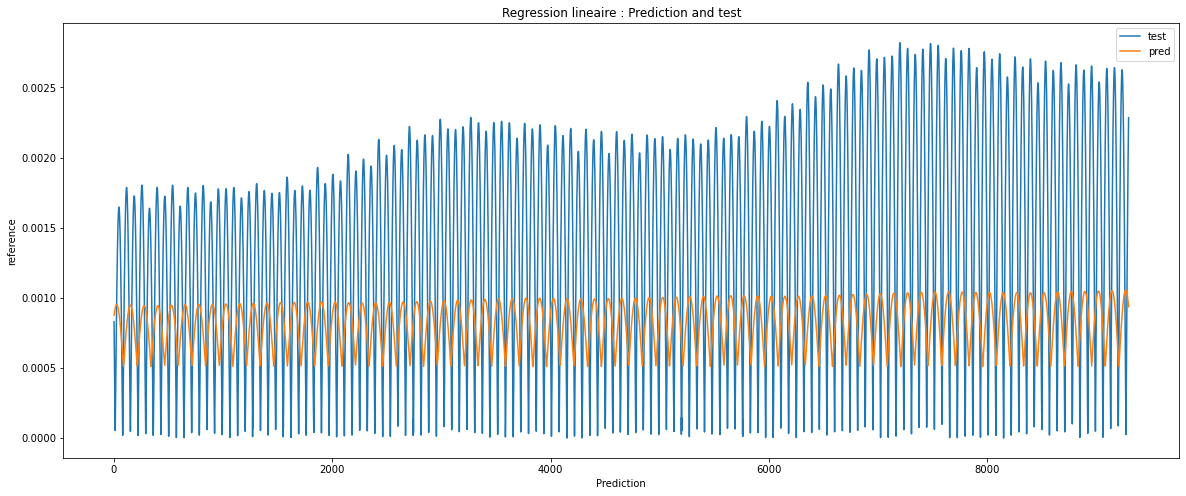

In [110]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "pred")
plt.title("Regression lineaire : Prediction and test")
plt.xlabel("Prediction")
plt.ylabel("reference")
plt.legend()
plt.show()

# Entrainement modèle Random Forest

In [111]:
reg = RandomForestRegressor()

In [112]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
y_pred = reg.predict(X_test)

In [115]:
reg.score(X_test,y_test)
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

8.779590365260383e-07
0.0009369946832965694
0.0007771343332810872


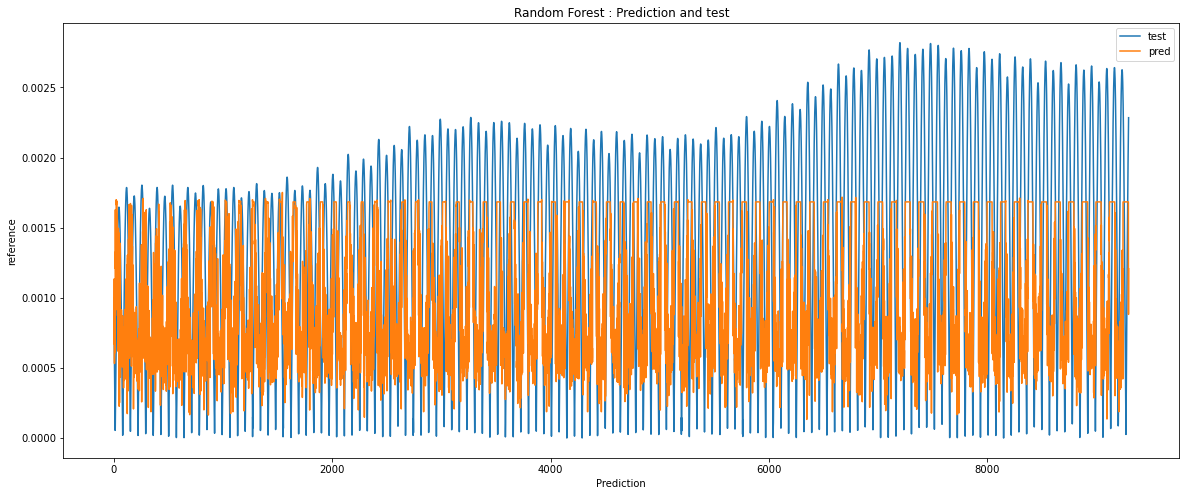

In [117]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "pred")
plt.title("Random Forest : Prediction and test")
plt.xlabel("Prediction")
plt.ylabel("reference")
plt.legend()
plt.show()

# Entrainement modèle XGB

In [124]:
reg = xgb.XGBModel()

In [125]:
reg.fit(X_train,y_train)

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
         interaction_constraints='', learning_rate=0.300000012,
         max_delta_step=0, max_depth=6, min_child_weight=1,
         monotone_constraints='()', n_jobs=4, num_parallel_tree=1,
         objective='reg:squarederror', random_state=0, reg_alpha=0,
         reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=1)

In [126]:
y_pred = reg.predict(X_test)

In [127]:
#print(reg.score(X_test),y_test)
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

8.330123689240986e-07
0.0009126951127973123
0.0007671396346853636


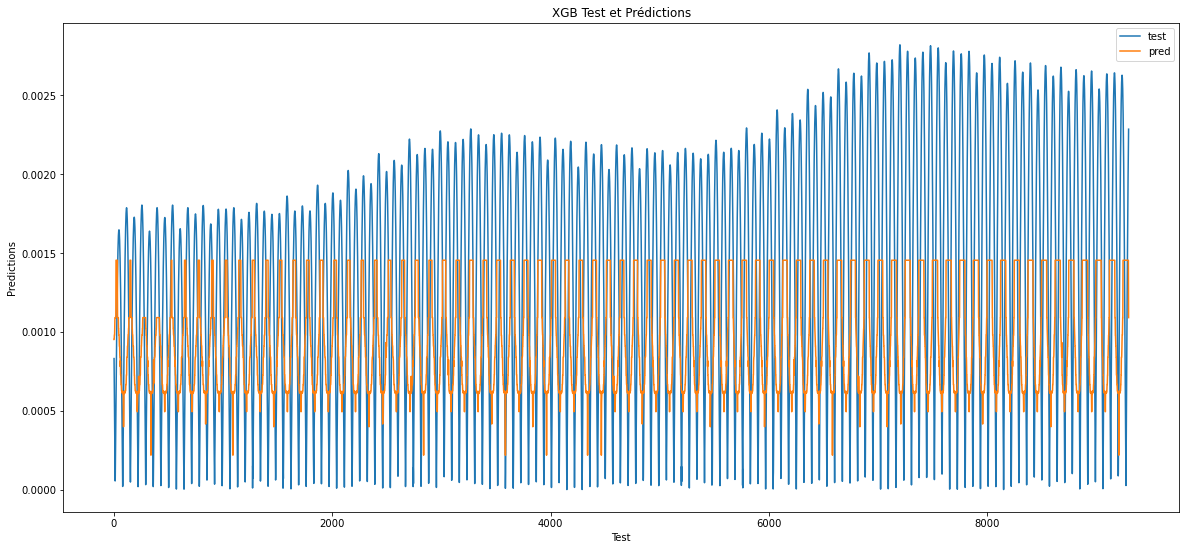

In [128]:
plt.figure(figsize = (20,9))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "pred")
plt.title("XGB Test et Prédictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.legend()
plt.show()

# Entraînement Lasso Regression

In [133]:
reg = linear_model.Lasso()

In [134]:
reg.fit(X_train,y_train)

Lasso()

In [135]:
y_pred = reg.predict(X_test)

In [139]:
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-1.1266566026294393
1.134333502290789e-06
0.001065050938824425
0.0008986932240592281


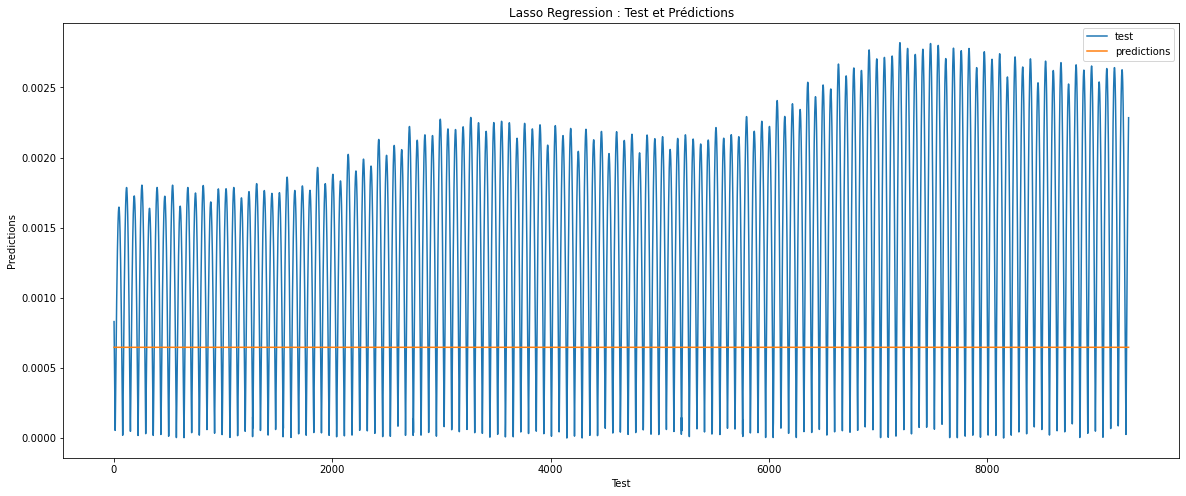

In [140]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("Lasso Regression : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement Extra Trees Regression

In [142]:
reg = ExtraTreesRegressor()

In [143]:
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [144]:
y_pred = reg.predict(X_test)

In [145]:
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.6746302624640879
8.932279937975615e-07
0.000945107398022871
0.0007817168578733531


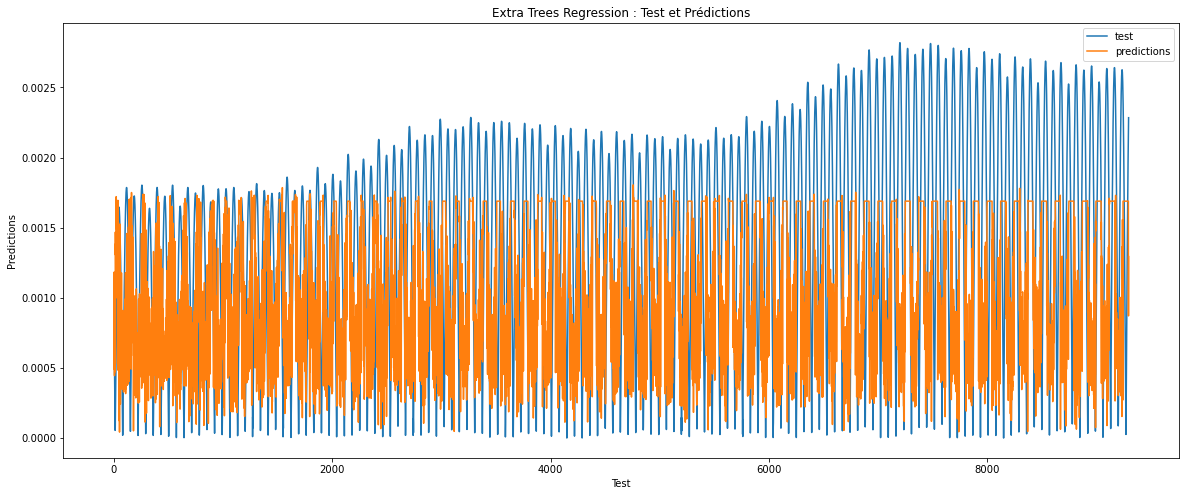

In [146]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("Extra Trees Regression : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement Bagging Regressor

In [149]:
reg = BaggingRegressor()

In [150]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.6547539709163697
8.826262147534041e-07
0.0009394818863359762
0.0007793534582586951


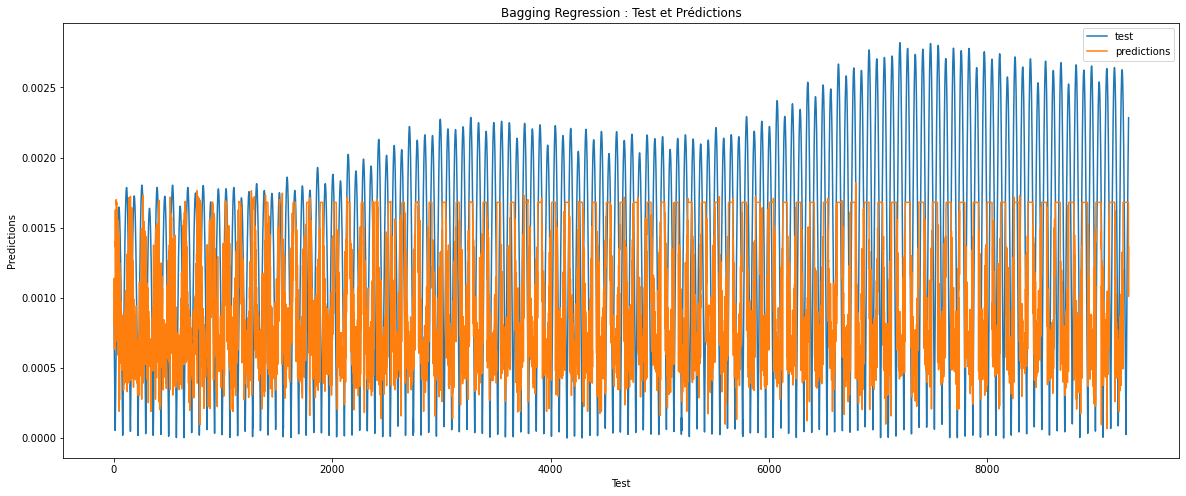

In [151]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("Bagging Regression : Test et Prédictions")
plt.legend()
plt.show()

# Entraînement GradientBoostingRegressor

In [153]:
reg = GradientBoostingRegressor()

In [154]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.5665869304427325
8.355989571870347e-07
0.000914111020164966
0.0007642673055190992


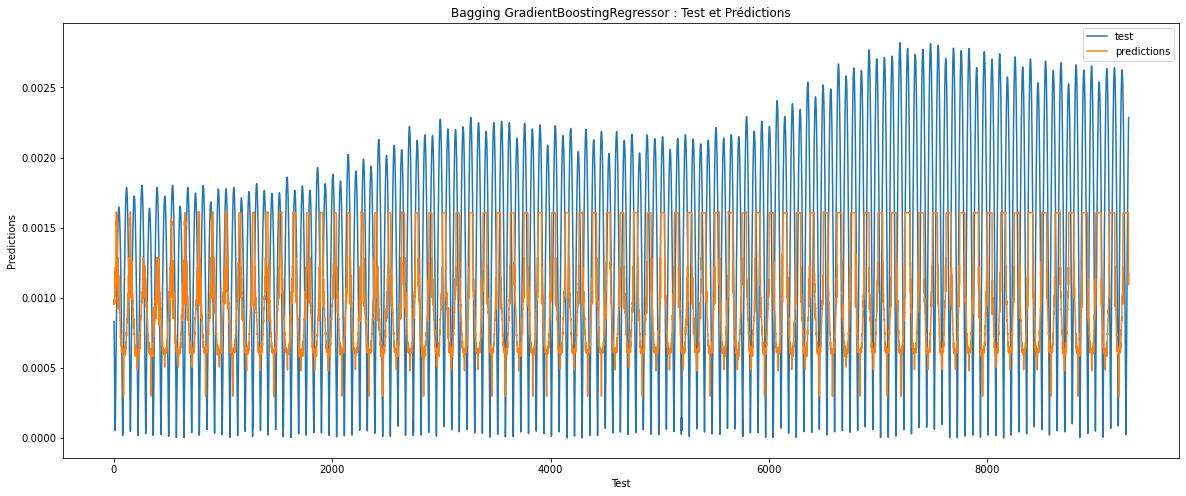

In [155]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("GradientBoostingRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entraînement AdaBoost Regressor

In [42]:
reg = AdaBoostRegressor()

In [43]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.5867283253983522
8.463421392563831e-07
0.0009199685534062472
0.0007791868991592911


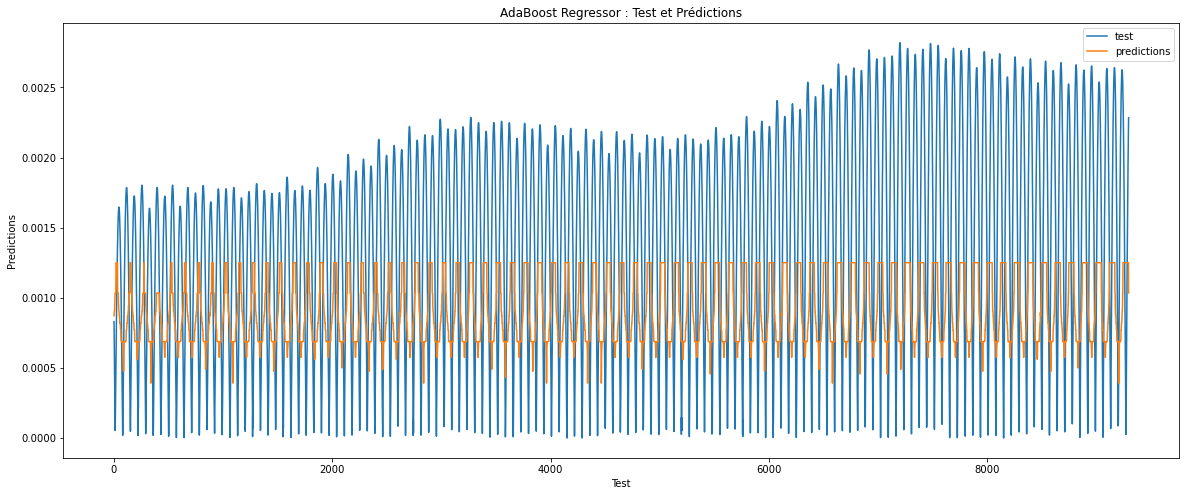

In [161]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("AdaBoost Regressor : Test et Prédictions")
plt.legend()
plt.show()

# Entraînement ARDRegression

In [19]:
reg = ARDRegression()

In [33]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.7038240933899527
9.087996382456952e-07
0.0009533098332891018
0.000806500991702638


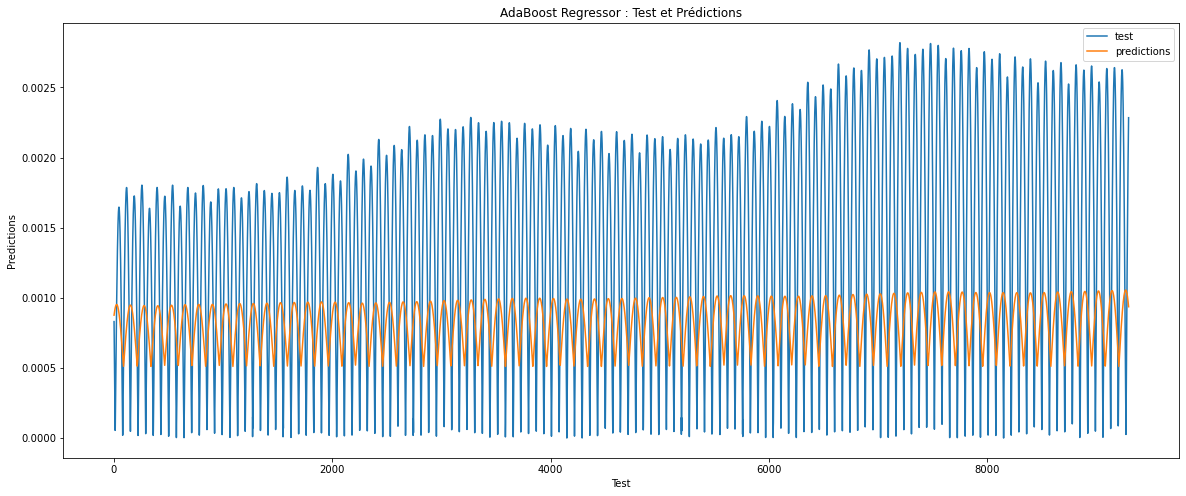

In [34]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("ARDR Regressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement PassiveAggressiveRegressor

In [44]:
reg = PassiveAggressiveRegressor()

In [45]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-3.792840154093586
2.556444303791636e-06
0.0015988884588337099
0.0014223417733622255


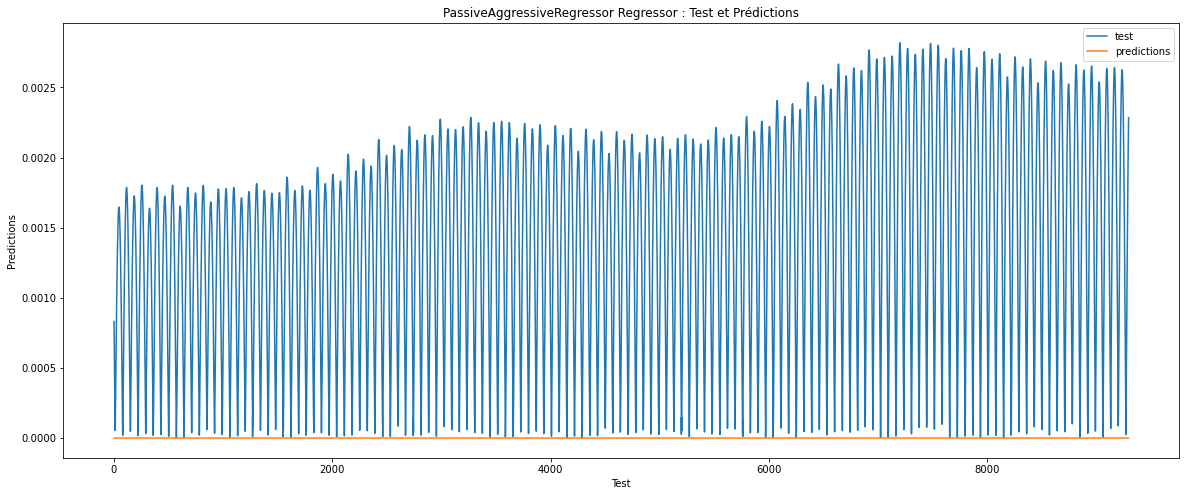

In [47]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("PassiveAggressiveRegressor Regressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement SGDRegressor

In [48]:
reg = SGDRegressor()

In [49]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-1.1668024463642719
1.1557468209572097e-06
0.0010750566594171721
0.0009071502382079925


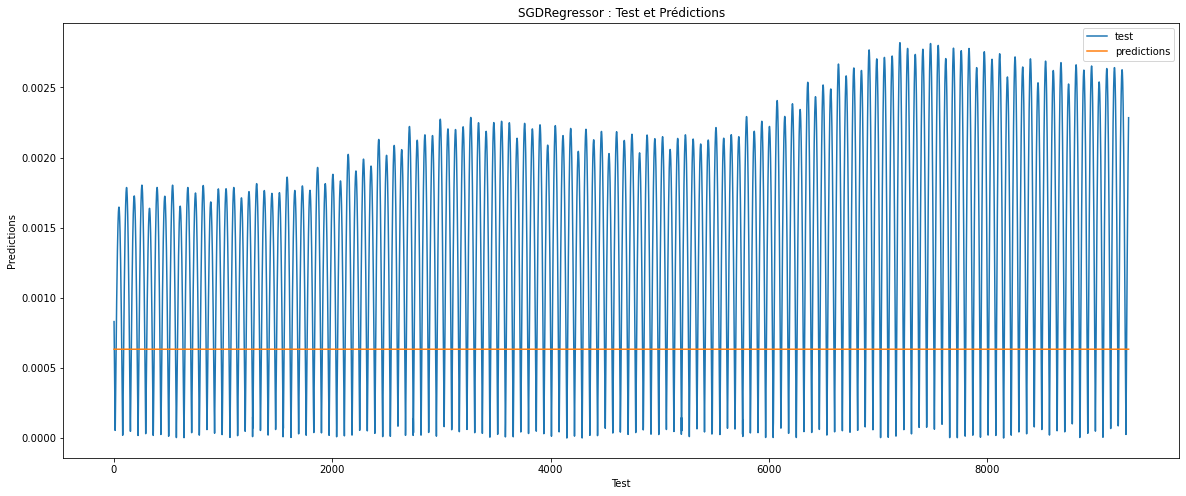

In [50]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("SGDRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement TheilSenRegressor

In [52]:
reg = TheilSenRegressor()

In [53]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.7220635175743926
9.185283315802571e-07
0.0009583988374263907
0.0008105843585570245


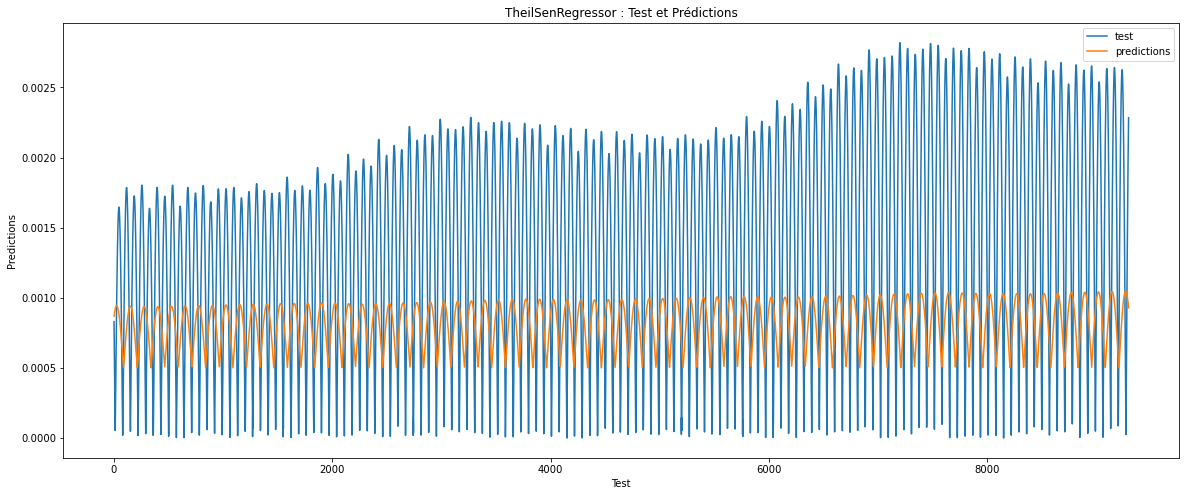

In [54]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("TheilSenRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement RANSACRegressor

In [63]:
reg = RANSACRegressor()

In [64]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-2.0125690760310024
1.6068687472542628e-06
0.001267623267084611
0.0010763631907565942


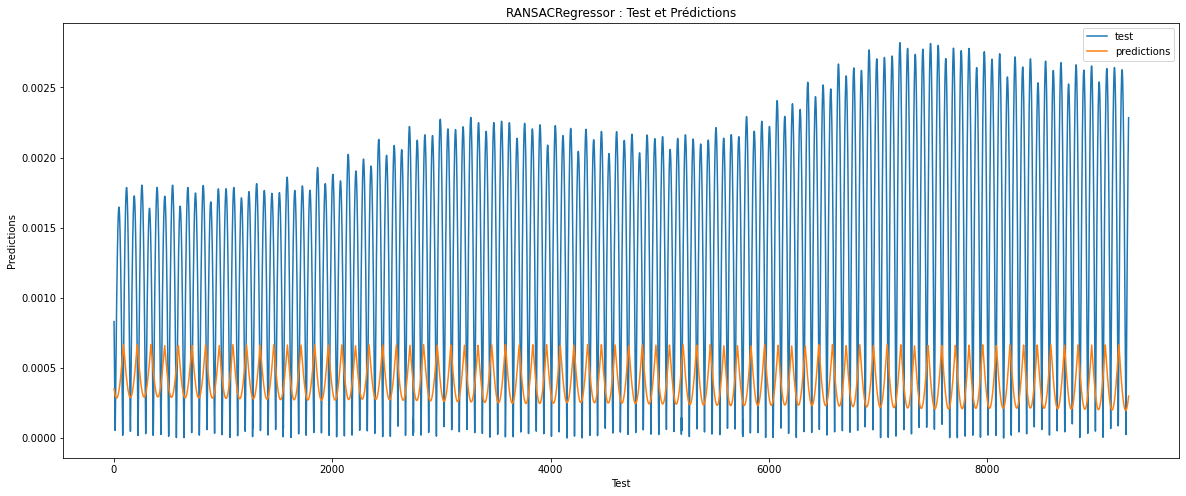

In [65]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("RANSACRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement MultiOutputRegressor

In [60]:
reg = MultiOutputRegressor()

TypeError: __init__() missing 1 required positional argument: 'estimator'

# Entrainement KNeighborsRegressor

In [62]:
reg = KNeighborsRegressor()

In [66]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-1.1405687026053668
1.141754052026182e-06
0.0010685289196021707
0.0009022133356597232


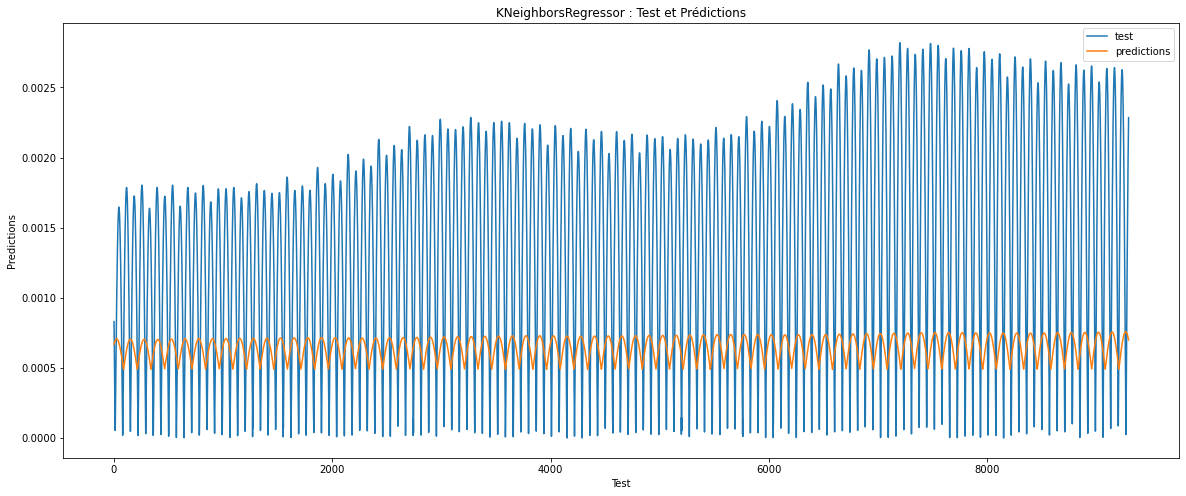

In [67]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("KNeighborsRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement RadiusNeighborsRegressor

In [70]:
reg = RadiusNeighborsRegressor()

In [71]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-1.1266566026294393
1.134333502290789e-06
0.001065050938824425
0.0008986932240592281


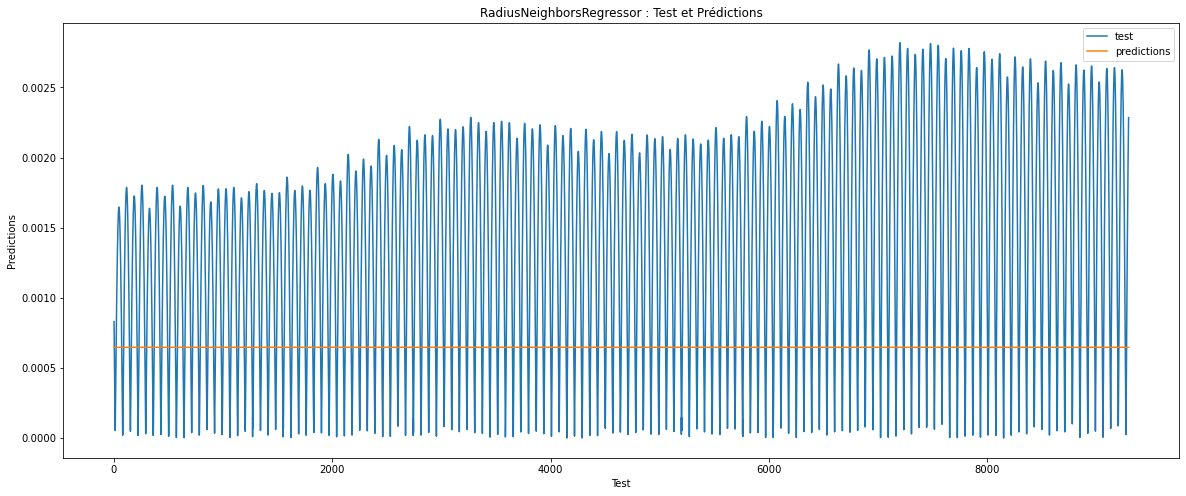

In [72]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("RadiusNeighborsRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainemeent DecisionTreeRegressor

In [75]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.6887644914293736
9.007670245110998e-07
0.0009490874693678659
0.000786016664171613


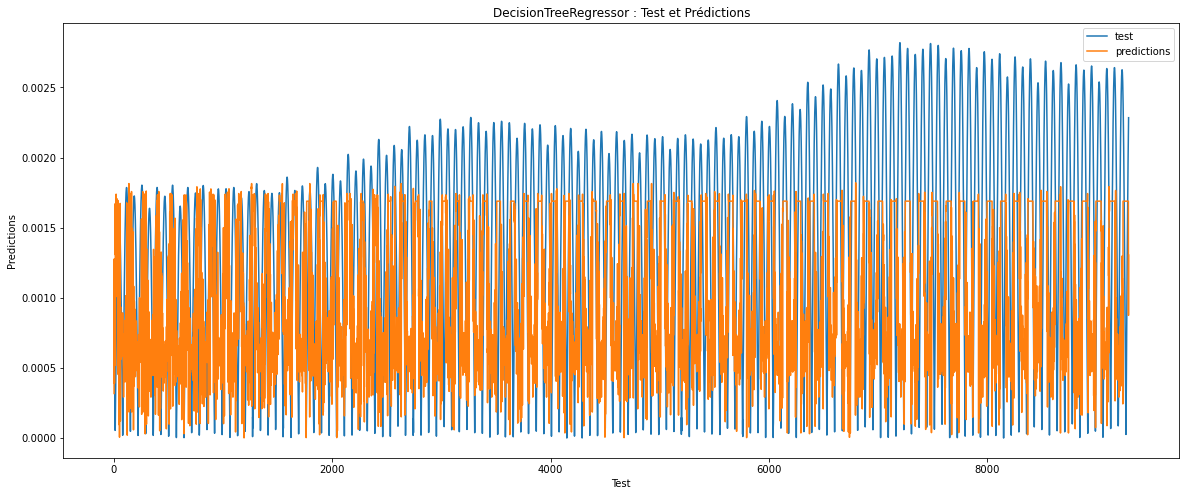

In [76]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("DecisionTreeRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement HuberRegressor()

In [77]:
reg = HuberRegressor()

In [78]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.697190090404213
9.052611394435296e-07
0.0009514521214667239
0.0008045832650521182


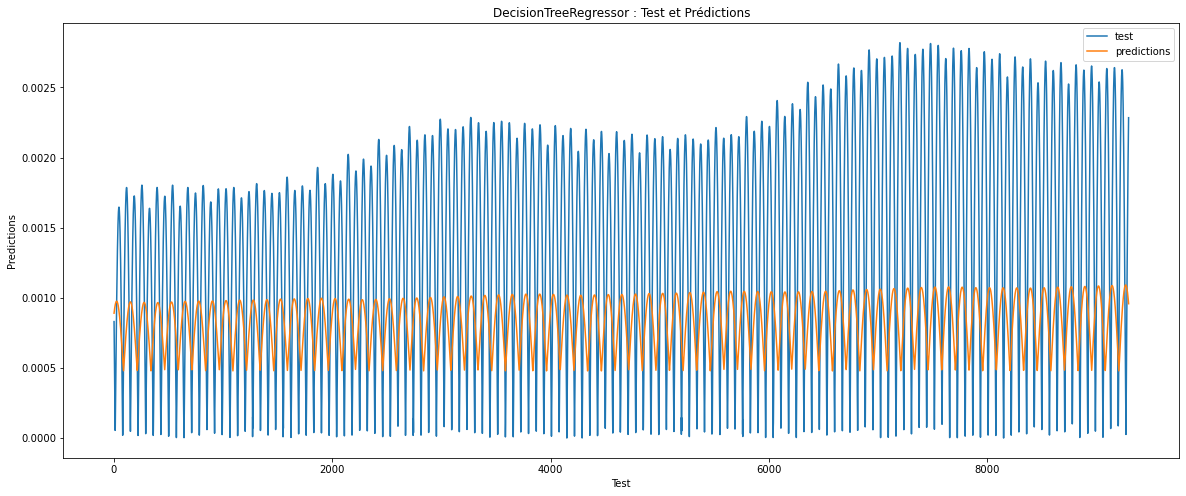

In [79]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("DecisionTreeRegressor : Test et Prédictions")
plt.legend()
plt.show()

# Entrainement Reseaux de neurones

In [12]:
model = Sequential()
#model.add(Dense(128,input_dim=1, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(30,input_dim=1,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,))
model.add(Activation('sigmoid'))

opt = Adam(learning_rate=0.0001)

model.compile(loss='mean_squared_error', optimizer= opt)

model.fit(X_train,y_train,batch_size = 10, epochs=50,verbose=1)

Epoch 1/50
3718/3718 [==============================] - 4s 919us/step - loss: 0.1255
Epoch 2/50
3718/3718 [==============================] - 3s 915us/step - loss: 7.5861e-04
Epoch 3/50
3718/3718 [==============================] - 3s 904us/step - loss: 5.0080e-05
Epoch 4/50
3718/3718 [==============================] - 3s 917us/step - loss: 4.4348e-06
Epoch 5/50
3718/3718 [==============================] - 3s 914us/step - loss: 4.2608e-07
Epoch 6/50
3718/3718 [==============================] - 3s 929us/step - loss: 1.7823e-07
Epoch 7/50
3718/3718 [==============================] - 3s 926us/step - loss: 1.7458e-07
Epoch 8/50
3718/3718 [==============================] - 3s 928us/step - loss: 1.7539e-07
Epoch 9/50
3718/3718 [==============================] - 4s 944us/step - loss: 1.7573e-07
Epoch 10/50
3718/3718 [==============================] - 3s 934us/step - loss: 1.7581e-07
Epoch 11/50
3718/3718 [==============================] - 3s 896us/step - loss: 1.7605e-07
Epoch 12/50
3718/3718 [

In [14]:
y_pred = model.predict(X_test)

In [15]:
#print(model.score(X_test,y_test))
score = model.evaluate(X_test, y_test, batch_size=10)
print(score)
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

930/930 [==============================] - 1s 753us/step - loss: 1.1476e-06
1.147555849456694e-06
1.1475561061950196e-06
0.0010712404520904818
0.0009038671357229238


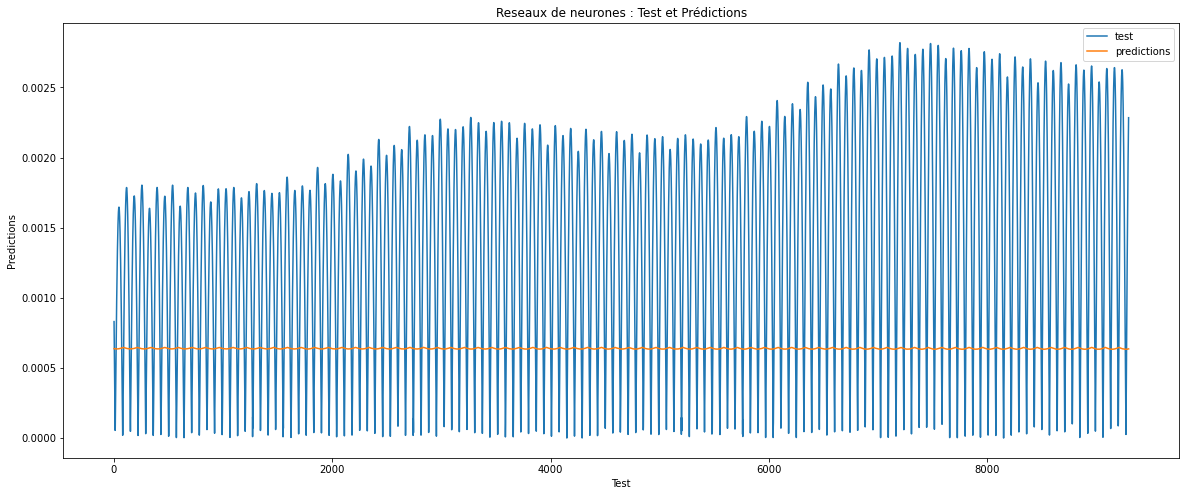

In [16]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("Reseaux de neurones : Test et Prédictions")
plt.legend()
plt.show()